<a href="https://colab.research.google.com/github/hodangtu01/HOMEWORK1---AI/blob/main/Course_BT_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=2c00f4c3253fb70508d12d122833c63ea78debc83cd6fc036eb0457a52c022da
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


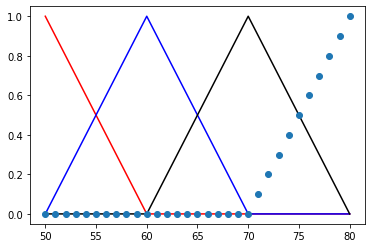

In [16]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Tạo một mảng giá trị
x = np.arange(50, 81 ,1)
# Động cơ có dạng tam giác --> triangle(x[a,b,c])
slow = fuzz.trimf(x,[50, 50, 60])
medium = fuzz.trimf(x,[50, 60, 70])
medium_fast = fuzz.trimf(x,[60,70,80])
fullspeed = fuzz.trimf(x,[70,80,80])
# Vẽ đồ thị và cho hiển thị màu 
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label = 'slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'medium')
plt.plot(x,medium_fast,'k',linewidth=1.5,label = 'medium_fast')
plt.plot(x,fullspeed,'o',linewidth=1.5,label = 'fullspeed')




25.0


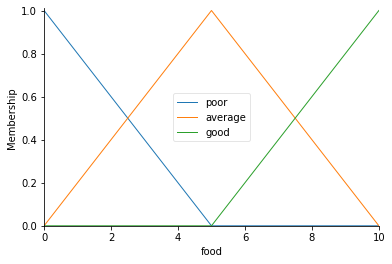

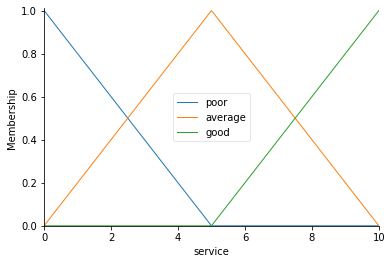

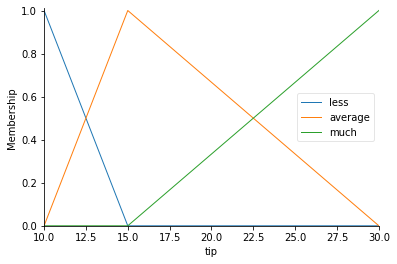

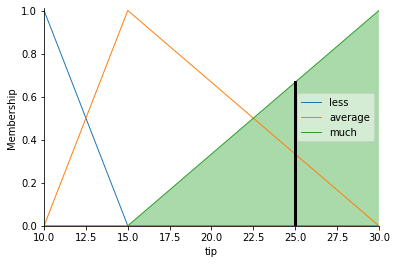

In [45]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl
# Antecedent -> input
# Gaussmf(x,a,b)
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
# Tạo hàm liên thuộc
# Lấy biến food với hàm poor với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['average']= fuzz.trimf(tip.universe,[10,15,30])
tip['much'] = fuzz.trimf(tip.universe,[15,30,30])

food.view()
service.view()
tip.view()

# Tạo luật
# Muốn nhấn mạnh service['average].view()
rule1 = ctrl.Rule(food['poor'] & service['poor'] , tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'] , tip['average'])
rule3 = ctrl.Rule(food['poor'] & service['good'] , tip['much'])
rule4 = ctrl.Rule(food['average'] & service['poor'] , tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'] , tip['much'])
rule6 = ctrl.Rule(food['average'] & service['good'] , tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'] , tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'] , tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'] , tip['much'])

# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)



90.0


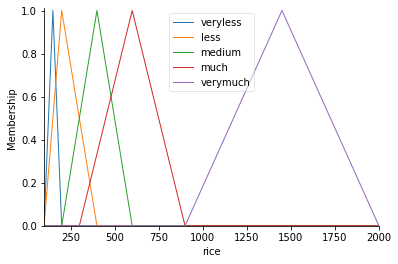

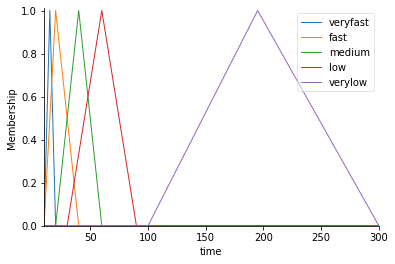

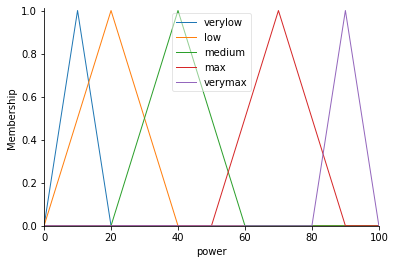

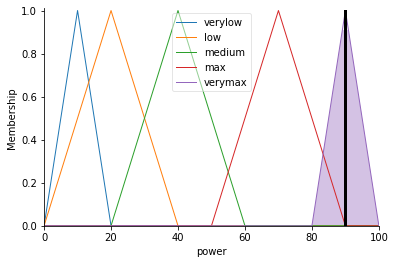

In [50]:
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl
# Antecedent -> input
# Gaussmf(x,a,b)
rice = ctrl.Antecedent(np.arange(100,2001,1),'rice')
time = ctrl.Antecedent(np.arange(10,301,1),'time')
power = ctrl.Consequent(np.arange(0,101,1),'power')
# Tạo hàm liên thuộc
# Lấy biến food với hàm poor với hàm trimf (universe) hàm phổ quát lấy giá trị mảng food để truyền vào
rice['veryless'] = fuzz.trimf(rice.universe,[100,150,200])
rice['less'] = fuzz.trimf(rice.universe,[100,200,400])
rice['medium'] = fuzz.trimf(rice.universe,[200,400,600])
rice['much'] = fuzz.trimf(rice.universe,[300,600,900])
rice['verymuch'] = fuzz.trimf(rice.universe,[900,1450,2000])


time['veryfast']= fuzz.trimf(time.universe,[10,15,20])
time['fast']= fuzz.trimf(time.universe,[10,20,40])
time['medium']= fuzz.trimf(time.universe,[20,40,60])
time['low']= fuzz.trimf(time.universe,[30,60,90])
time['verylow']= fuzz.trimf(time.universe,[100,195,300])

power['verylow']= fuzz.trimf(power.universe,[0,10,20])
power['low']= fuzz.trimf(power.universe,[0,20,40])
power['medium']= fuzz.trimf(power.universe,[20,40,60])
power['max']= fuzz.trimf(power.universe,[50,70,90])
power['verymax']= fuzz.trimf(power.universe,[80,90,100])


rice.view()
time.view()
power.view()

# Tạo luật
# Muốn nhấn mạnh service['average].view()
rule1 = ctrl.Rule(rice['veryless'] & time['veryfast'] , power['verymax'])
rule2 = ctrl.Rule(rice['veryless'] & time['fast'] , power['verymax'])
rule3 = ctrl.Rule(rice['veryless'] & time['medium'] , power['medium'])
rule4 = ctrl.Rule(rice['veryless'] & time['low'] , power['medium'])
rule5 = ctrl.Rule(rice['veryless'] & time['verylow'] , power['medium'])

rule6 = ctrl.Rule(rice['less'] & time['veryfast'] , power['verymax'])
rule7 = ctrl.Rule(rice['less'] & time['fast'] , power['verymax'])
rule8 = ctrl.Rule(rice['less'] & time['medium'] , power['medium'])
rule9 = ctrl.Rule(rice['less'] & time['low'] , power['medium'])
rule10 = ctrl.Rule(rice['less'] & time['verylow'] , power['medium'])

rule11 = ctrl.Rule(rice['medium'] & time['veryfast'] , power['verymax'])
rule12 = ctrl.Rule(rice['medium'] & time['fast'] , power['max'])
rule13 = ctrl.Rule(rice['medium'] & time['medium'] , power['medium'])
rule14 = ctrl.Rule(rice['medium'] & time['low'] , power['medium'])
rule15 = ctrl.Rule(rice['medium'] & time['verylow'] , power['low'])

rule16 = ctrl.Rule(rice['much'] & time['veryfast'] , power['verymax'])
rule17 = ctrl.Rule(rice['much'] & time['fast'] , power['verymax'])
rule18 = ctrl.Rule(rice['much'] & time['medium'] , power['medium'])
rule19 = ctrl.Rule(rice['much'] & time['low'] , power['low'])
rule20 = ctrl.Rule(rice['much'] & time['verylow'] , power['verylow'])

rule21 = ctrl.Rule(rice['verymuch'] & time['veryfast'] , power['verymax'])
rule22 = ctrl.Rule(rice['verymuch'] & time['fast'] , power['verymax'])
rule23 = ctrl.Rule(rice['verymuch'] & time['medium'] , power['medium'])
rule24 = ctrl.Rule(rice['verymuch'] & time['low'] , power['low'])
rule25 = ctrl.Rule(rice['verymuch'] & time['verylow'] , power['verylow'])



# Thu thập dữ liệu ControlSystem
# Học dữ liệu SystemSimulation --> Truyền giá trị (đọc từ cảm biến)(thường đưa vào vòng lặp để quét)-->compute để tính toán
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['rice'] = 1500
tipping.input['time'] = 15
tipping.compute()
print(tipping.output['power'])
power.view(sim = tipping)